In [12]:
def gaussian_psf(size=21, sigma=3):
    ax = np.arange(-size // 2 + 1., size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    psf = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    psf /= np.sum(psf)
    return psf


In [13]:
def wiener_deconvolution(img, psf, K):
    img = img.astype(np.float32) / 255.0

    # Pad PSF to image size
    psf_padded = np.zeros_like(img)
    kh, kw = psf.shape
    psf_padded[:kh, :kw] = psf

    # FFTs
    IMG = np.fft.fft2(img)
    PSF = np.fft.fft2(psf_padded)

    PSF_conj = np.conj(PSF)
    denom = (np.abs(PSF)**2 + K)

    result = PSF_conj / denom * IMG
    result = np.fft.ifft2(result)
    result = np.abs(result)

    result = np.clip(result * 255, 0, 255).astype(np.uint8)
    return result


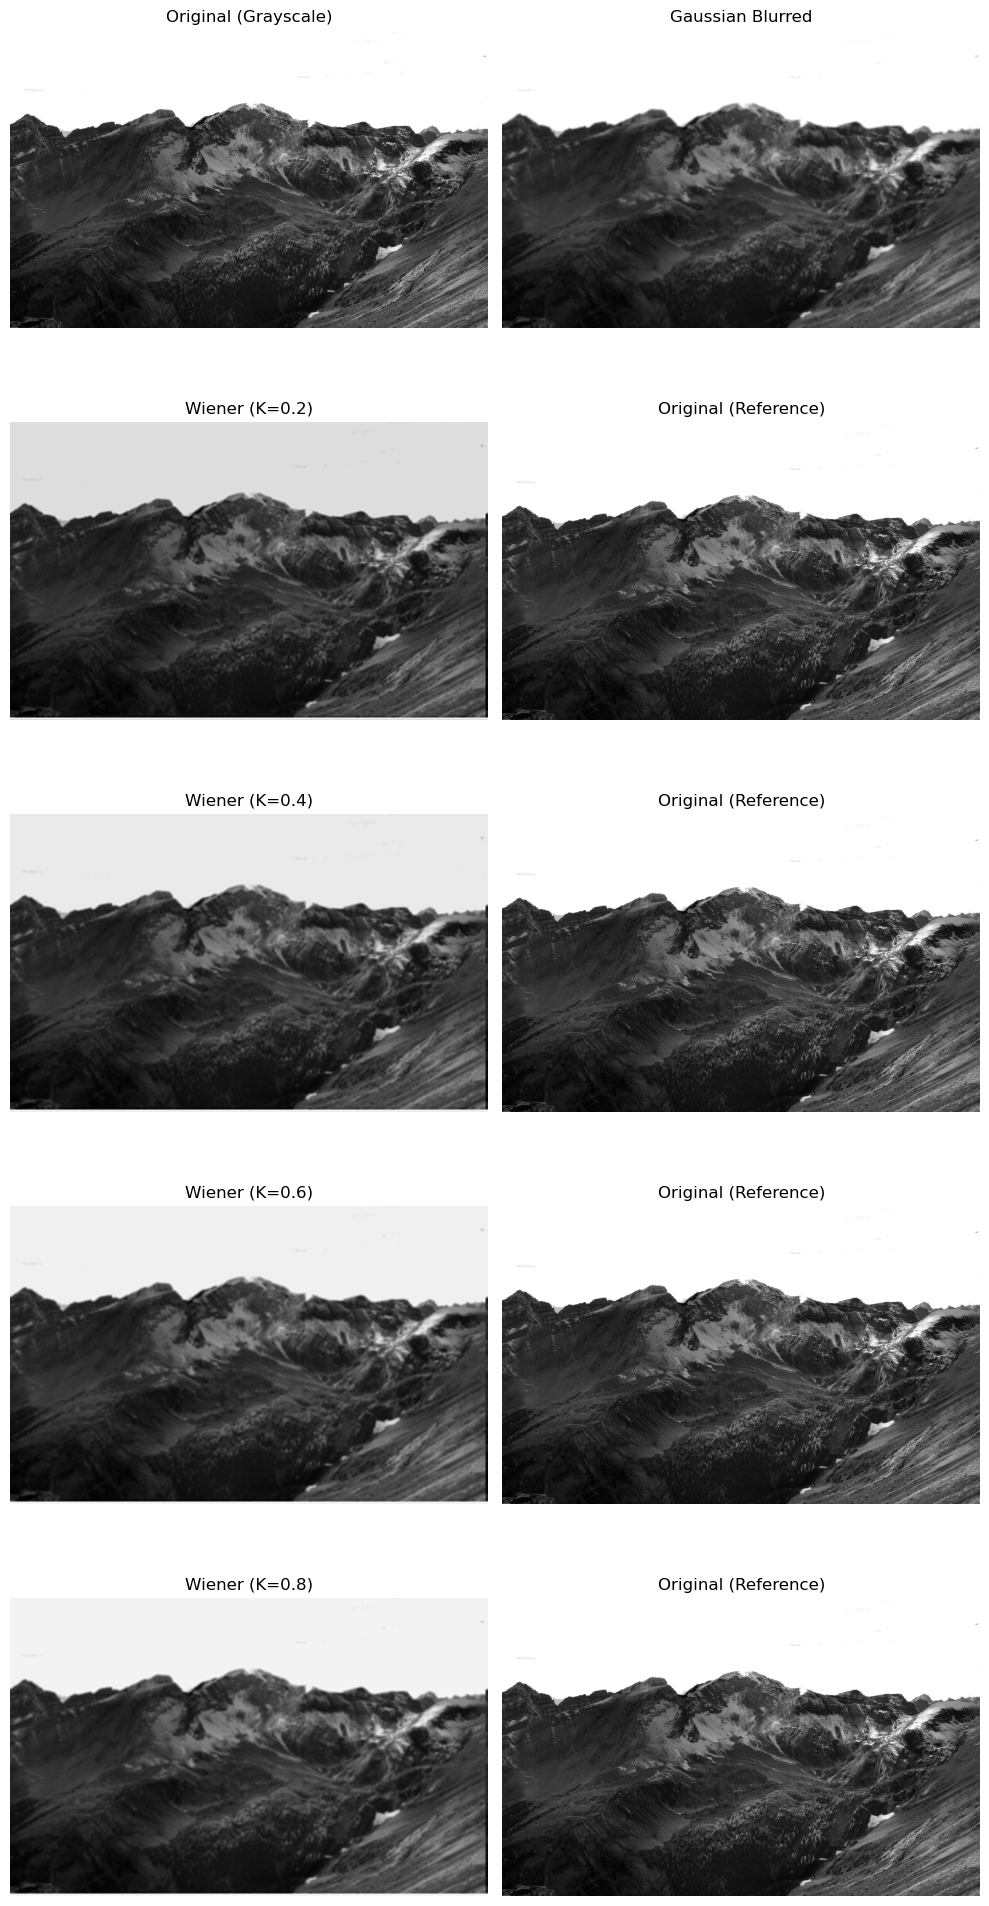

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = r"C:\Users\3kp05\Downloads\mountains-0m6.png"  

img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError("Image not found")

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

ksize = 21
sigma = 3
blurred = cv2.GaussianBlur(gray, (ksize, ksize), sigma)

psf = gaussian_psf(size=ksize, sigma=sigma)

K_values = [0.2,0.4,0.6,0.8]
restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]


# DISPLAY RESULTS

rows = len(K_values) + 1   #for reference row
cols = 2

plt.figure(figsize=(10, 4 * rows))

# Reference Row
plt.subplot(rows, cols, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original (Grayscale)")
plt.axis("off")

plt.subplot(rows, cols, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis("off")

#  Wiener Rows
for i, (K, rec) in enumerate(zip(K_values, restored), start=1):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()

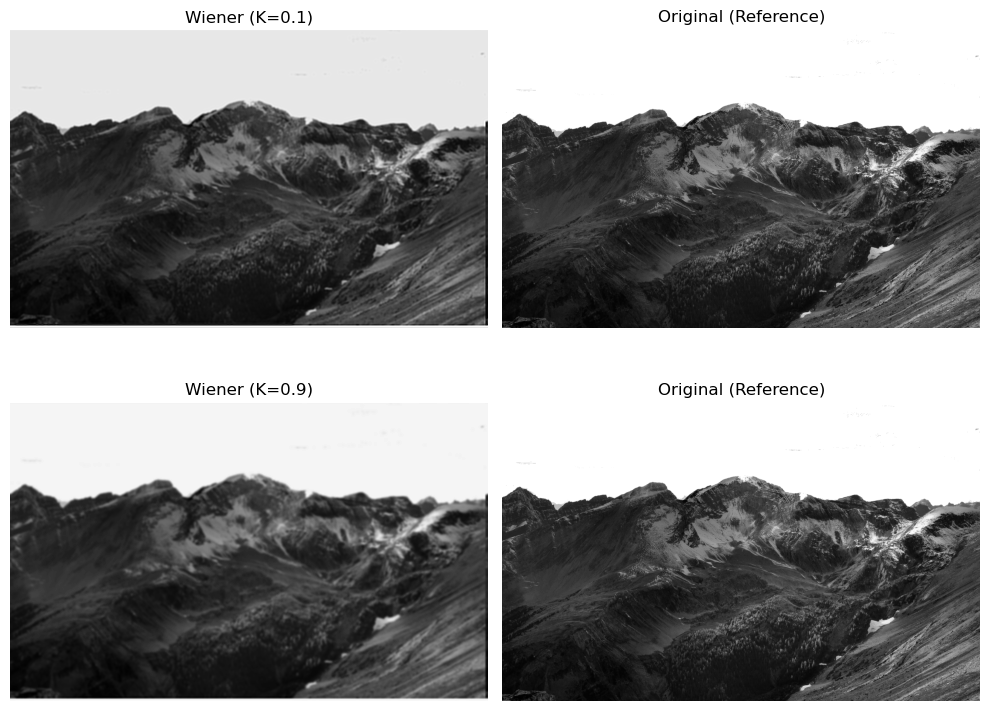

In [16]:

K_values = [0.1,0.9]

restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]

rows = len(K_values)
cols = 2

plt.figure(figsize=(10, 4 * rows))

for i, (K, rec) in enumerate(zip(K_values, restored)):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()


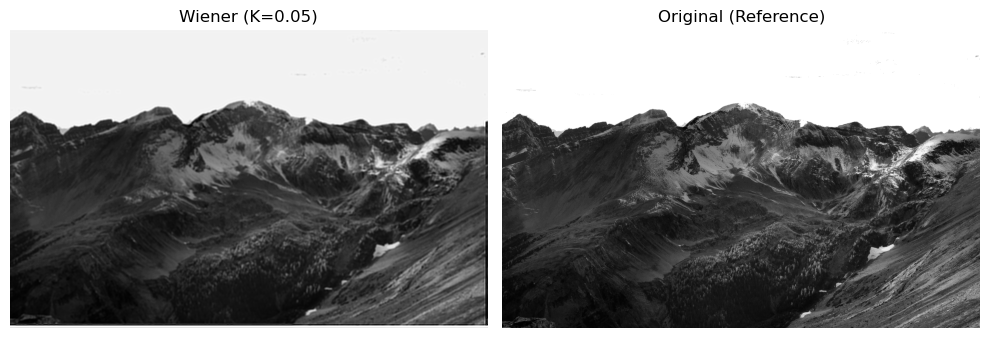

In [17]:
# Try new K values here
K_values = [0.05]

restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]

rows = len(K_values)
cols = 2

plt.figure(figsize=(10, 4 * rows))

for i, (K, rec) in enumerate(zip(K_values, restored)):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()


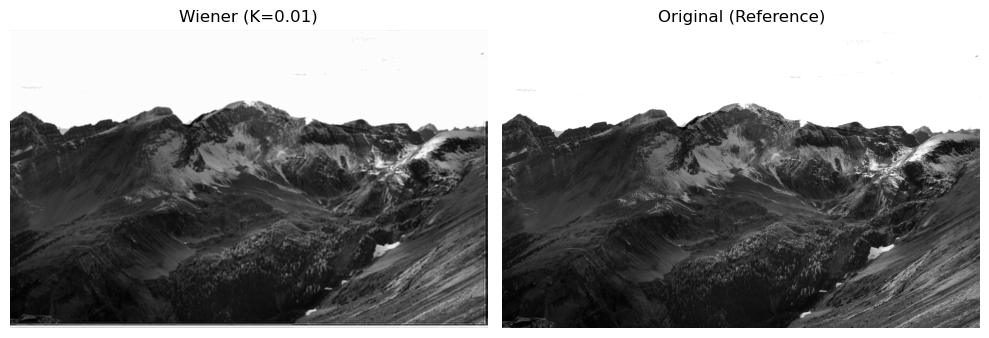

In [18]:
# Try new K values here
K_values = [0.01]

restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]

rows = len(K_values)
cols = 2

plt.figure(figsize=(10, 4 * rows))

for i, (K, rec) in enumerate(zip(K_values, restored)):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()


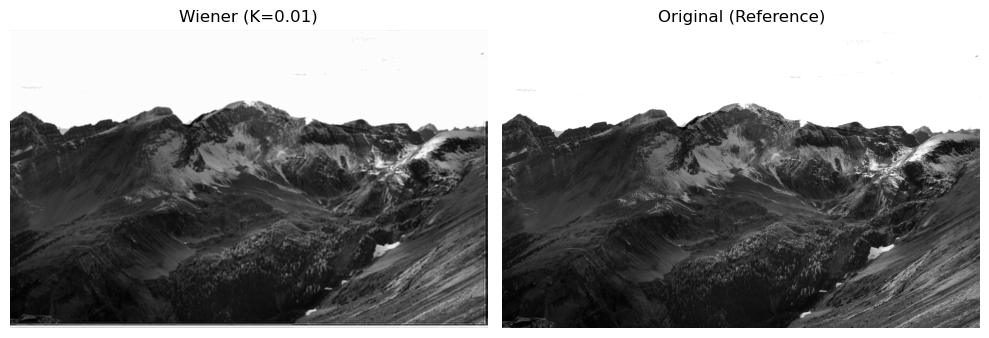

In [19]:
# Try new K values here
K_values = [0.01]

restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]

rows = len(K_values)
cols = 2

plt.figure(figsize=(10, 4 * rows))

for i, (K, rec) in enumerate(zip(K_values, restored)):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()


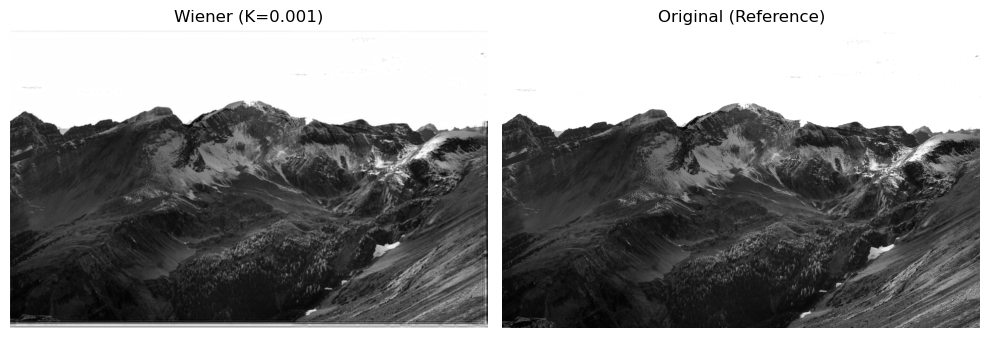

In [20]:
# Try new K values here
K_values = [0.001]

restored = [wiener_deconvolution(blurred, psf, K) for K in K_values]

rows = len(K_values)
cols = 2

plt.figure(figsize=(10, 4 * rows))

for i, (K, rec) in enumerate(zip(K_values, restored)):
    plt.subplot(rows, cols, i * cols + 1)
    plt.imshow(rec, cmap='gray')
    plt.title(f"Wiener (K={K})")
    plt.axis("off")

    plt.subplot(rows, cols, i * cols + 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Original (Reference)")
    plt.axis("off")

plt.tight_layout()
plt.show()
